# Mount dataset resources

In [1]:
import re
import pandas as pd
import numpy as np
import warnings

import datetime
from datetime import datetime, date
import time

# Visualisation
from matplotlib import pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# чтениие/запись файлов в feather-формате
import feather

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/github/eda_examples/Kaggle_Adult_income_dataset/'
%pwd

/content/drive/MyDrive/github/eda_examples/Kaggle_Adult_income_dataset


'/content/drive/MyDrive/github/eda_examples/Kaggle_Adult_income_dataset'

# Lab 2. Nearest neighbors methods
# Метрические методы классификации

## 1 Методы ближайших соседей

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)});

### 1. Подключитесь к одному из наборов данных на Kaggle:
Вариант 2: Adult income

In [5]:
df = pd.read_csv('adult.csv')

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


**Почистим значения "?"**

In [ ]:
# print (df.shape)
# print (df.head(10))

In [ ]:
# df['native-country'] = df['native-country'].replace('?',np.nan)
# df['workclass'] = df['workclass'].replace('?',np.nan)
# df['occupation'] = df['occupation'].replace('?',np.nan)
#
# df.dropna(how='any',inplace=True)
#
# print (df.shape)
# print (df.head(10))

**====================================================**

### 4. Предобработка данных (preprocessing).

Как можно заметить - значение "United-States" на первом месте намного превышает значение "Mexico", которое находмтся на втором месте (43832 и 951) соответственно.
Поэтому идея разбить страны на "US" и "Not US" (0 и 1 соотвественно)

In [8]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [9]:
df.loc[df['native-country'] != 'United-States', 'native-country'] = 0
df.loc[df['native-country'] == 'United-States', 'native-country'] = 1

In [10]:
df['native-country'].value_counts()

1    43832
0     5010
Name: native-country, dtype: int64

**=====================================**

In [11]:
new_values = {'<=50K':0, ">50K":1} # обычный словарь Python
df['dummy_income'] = df['income'].map(new_values)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,dummy_income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,1,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,1,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,>50K,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,1,<=50K,0


In [12]:
new_values_1 = {'Male':0, "Female":1} # обычный словарь Python
df['dummy_gender'] = df['gender'].map(new_values_1)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,dummy_income,dummy_gender
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,1,<=50K,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,1,<=50K,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,>50K,1,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,>50K,1,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,1,<=50K,0,1


**==========================================**

In [13]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,dummy_income,dummy_gender
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,1,<=50K,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,1,<=50K,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,>50K,1,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,>50K,1,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,1,<=50K,0,1


In [14]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [15]:
new_race = {'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4}
df['dummy_race'] = df['race'].map(new_race)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,dummy_income,dummy_gender,dummy_race
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,1,<=50K,0,0,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,1,<=50K,0,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,>50K,1,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,>50K,1,0,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,1,<=50K,0,1,0


In [16]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [17]:
new_workclass = {'Private':0, 'Self-emp-not-inc':1, 'Local-gov':2, '?':3, 'State-gov':4, 'Self-emp-inc':5, 'Federal-gov':6, 'Without-pay':7, 'Never-worked':8}
df['dummy_workclass'] = df['workclass'].map(new_workclass)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,dummy_income,dummy_gender,dummy_race,dummy_workclass
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,1,<=50K,0,0,1,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,1,<=50K,0,0,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,>50K,1,0,0,2
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,>50K,1,0,1,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,1,<=50K,0,1,0,3


In [18]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [19]:
new_marital_status = {'Married-civ-spouse':0, 'Never-married':1, 'Divorced':2, 'Separated':3, 'Widowed':4, 'Married-spouse-absent':5, 'Married-AF-spouse':6}
df['dummy_marital_status'] = df['marital-status'].map(new_marital_status)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,dummy_income,dummy_gender,dummy_race,dummy_workclass,dummy_marital_status
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,1,<=50K,0,0,1,0,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,1,<=50K,0,0,0,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,>50K,1,0,0,2,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,>50K,1,0,1,0,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,1,<=50K,0,1,0,3,1


In [20]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [21]:
new_occupation = {'Prof-specialty':0, 'Craft-repair':1, 'Exec-managerial':2, 'Adm-clerical':3, 'Sales':4, 'Other-service':5, 'Machine-op-inspct':6, '?':7, 'Transport-moving':8, 'Handlers-cleaners':9, 'Farming-fishing':10, 'Tech-support':11, 'Protective-serv':12, 'Priv-house-serv':13, 'Armed-Forces':14}
df['dummy_occupation'] = df['occupation'].map(new_occupation)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,dummy_income,dummy_gender,dummy_race,dummy_workclass,dummy_marital_status,dummy_occupation
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,1,<=50K,0,0,1,0,1,6
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,1,<=50K,0,0,0,0,0,10
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,>50K,1,0,0,2,0,12
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,>50K,1,0,1,0,0,6
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,1,<=50K,0,1,0,3,1,7


In [22]:
df['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [23]:
new_relationship = {'Husband':0, 'Wife':1, 'Not-in-family':2, 'Own-child':3, 'Unmarried':4, 'Other-relative':5}
df['dummy_relationship'] = df['relationship'].map(new_relationship)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,dummy_income,dummy_gender,dummy_race,dummy_workclass,dummy_marital_status,dummy_occupation,dummy_relationship
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,1,<=50K,0,0,1,0,1,6,3
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,1,<=50K,0,0,0,0,0,10,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,>50K,1,0,0,2,0,12,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,>50K,1,0,1,0,0,6,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,1,<=50K,0,1,0,3,1,7,3


**==========================================**

### 2. Извлеките целевой признак (target). Какая из задач обучения с учителем рассматривается –– классификация или регрессия?

Target (целевой признак) состоит из двух значений: тех, кто зарабатывает больше 50К и тех, кто зарабатывает меньше 50К. Сразу поменяем на 0 и 1 соответсвенно (преобразования сделаны выше). Следовательно - это задача классификации.

In [24]:
y = df['dummy_income']
df1 = df.drop(['income', 'dummy_income', 'gender', 'race', 'workclass', 'marital-status', 'occupation', 'relationship'], axis=1)
df1.head()

,age,fnlwgt,education,educational-num,capital-gain,capital-loss,hours-per-week,native-country,dummy_gender,dummy_race,dummy_workclass,dummy_marital_status,dummy_occupation,dummy_relationship
0,25,226802,11th,7,0,0,40,1,0,1,0,1,6,3
1,38,89814,HS-grad,9,0,0,50,1,0,0,0,0,10,0
2,28,336951,Assoc-acdm,12,0,0,40,1,0,0,2,0,12,0
3,44,160323,Some-college,10,7688,0,40,1,0,1,0,0,6,0
4,18,103497,Some-college,10,0,0,30,1,1,0,3,1,7,3


### 3. Каково распределение значений target-переменной? Постройте подходящую визуализацию. Прокомментируйте результат.

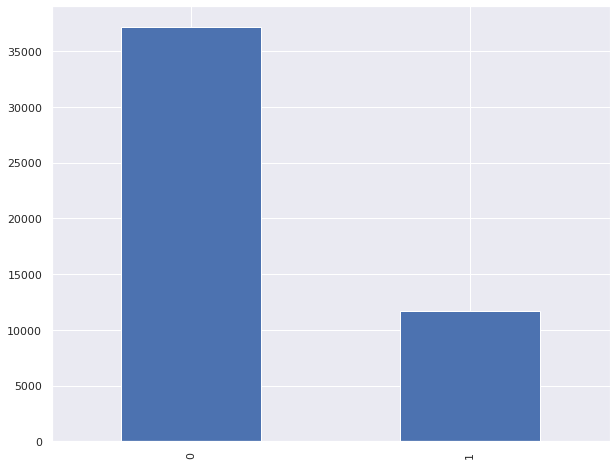

In [25]:
y.value_counts().plot(kind='bar');

In [26]:
print(y.value_counts(normalize=True))

0    0.760718
1    0.239282
Name: dummy_income, dtype: float64


Процент 0 (тех кто зарабатывает меньше 50К) значительно меньше 1 (>50K) (76% и 24% соответственно). Исходя из этого можно сказать, что ссылаться на точность будет не совсем корректно, так как программа в большинтсве случаев угадывает 0.

In [27]:
df1.head()

,age,fnlwgt,education,educational-num,capital-gain,capital-loss,hours-per-week,native-country,dummy_gender,dummy_race,dummy_workclass,dummy_marital_status,dummy_occupation,dummy_relationship
0,25,226802,11th,7,0,0,40,1,0,1,0,1,6,3
1,38,89814,HS-grad,9,0,0,50,1,0,0,0,0,10,0
2,28,336951,Assoc-acdm,12,0,0,40,1,0,0,2,0,12,0
3,44,160323,Some-college,10,7688,0,40,1,0,1,0,0,6,0
4,18,103497,Some-college,10,0,0,30,1,1,0,3,1,7,3


In [28]:
df[['educational-num', 'education']].value_counts()

educational-num  education   
9                HS-grad         15784
10               Some-college    10878
13               Bachelors        8025
14               Masters          2657
11               Assoc-voc        2061
7                11th             1812
12               Assoc-acdm       1601
6                10th             1389
4                7th-8th           955
15               Prof-school       834
5                9th               756
8                12th              657
16               Doctorate         594
3                5th-6th           509
2                1st-4th           247
1                Preschool          83
dtype: int64

In [29]:
df1 = df1.drop(['fnlwgt', 'education'], axis=1)
df1.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,native-country,dummy_gender,dummy_race,dummy_workclass,dummy_marital_status,dummy_occupation,dummy_relationship
0,25,7,0,0,40,1,0,1,0,1,6,3
1,38,9,0,0,50,1,0,0,0,0,10,0
2,28,12,0,0,40,1,0,0,2,0,12,0
3,44,10,7688,0,40,1,0,1,0,0,6,0
4,18,10,0,0,30,1,1,0,3,1,7,3


In [ ]:
# df_2 = pd.get_dummies(df1, columns=['marital-status', 'relationship', 'race', 'native-country'])
# df_2.head()

In [30]:
df1.shape

(48842, 12)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df1)
print(X[:5])

[[-0.99512893 -1.19725891 -0.14480353 -0.2171271  -0.03408696  0.33808291
  -0.70422049  1.24634274 -0.54966514  0.10110686  0.563611    0.91029368]
 [-0.04694151 -0.41933527 -0.14480353 -0.2171271   0.77292975  0.33808291
  -0.70422049 -0.35202596 -0.54966514 -0.8074969   1.7862169  -1.04384503]
 [-0.77631645  0.74755018 -0.14480353 -0.2171271  -0.03408696  0.33808291
  -0.70422049 -0.35202596  0.67764268 -0.8074969   2.39751984 -1.04384503]
 [ 0.39068346 -0.03037346  0.88687374 -0.2171271  -0.03408696  0.33808291
  -0.70422049  1.24634274 -0.54966514 -0.8074969   0.563611   -1.04384503]
 [-1.50569139 -0.03037346 -0.14480353 -0.2171271  -0.84110367  0.33808291
   1.42000981 -0.35202596  1.29129658  0.10110686  0.86926248  0.91029368]]


### 5. Разбейте набор данных на обучающую и валидационную (тестовую) выборки с помощью метода train_test_split.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

### 6. Обучите алгоритм классификации kNeighborsClassifier или регрессии KNeighborsRegressor .
Оцените качество каждой модели на валидационной выборке с помощью:
• accuracy_score для классификации;

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
y_pred = knn.predict(X_valid)
print(y_pred[:5])

[0 0 1 0 1]


In [35]:
print(y_valid[:5])

7762     0
23881    0
30507    1
28911    0
19484    0
Name: dummy_income, dtype: int64


In [36]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid, y_pred))

0.8416182130865613


out: 0.8402260257145197.
Получили точность ~ 84%. Но как было сказано выше - алгоритм чаще угадывает 0 чем 1, поэтому нельзя уверено сказать, что алгоритм так же хорошо предскажет результат на других данных.

Предыдущие результаты:
**0.8319547948570961** - "nice" result

0.8367865039718286 - без workclass

0.8375235443452624 - without workclass and occupation

**==================================================================**

## 2 Настройка оптимального числа ближайших соседей в методе kNN

### 1. Создайте генератор разбиений, который перемешивает выборку перед созданием блоков ( shuffle=True ).
Число блоков n_splits равно 5. Задайте также параметр random_state для воспроизводимости результатов. Например:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Найдите показатель качества модели kNN на кросс-валидации. Подумайте, приемлемо ли использование вашей меры (метрики) качества в данной задаче? При необходимости пересчитайте качество с помощью другой метрики из списка.

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42) # n_splits играет роль K
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [0.84041355 0.83662606 0.83548321 0.83364046 0.83190008]
Средняя метрика на кросс-валидации: 0.8356126732265541


**out:**
Массив значений метрики: [0.84123247 0.83550005 0.83497133 0.83404996 0.83087633]
Средняя метрика на кросс-валидации: 0.8353260292276568

### 2. Осуществите кросс-валидацию модели при числе соседей k ∈ [1;50]. Используйте GridSearchCV .
При каком k качество получилось наилучшим? Чему равна эта оценка качества? Постройте график значений метрики в зависимости от k
( matplotlib.pyplot.plot() ).

In [38]:
%%time
from sklearn.model_selection import GridSearchCV

knn_params={'n_neighbors': np.arange(1, 51)} # словарь параметров (ключ: набор возможных значений)

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy') # кросс-валидация по 5 блокам
knn_grid.fit(X_train, y_train)

CPU times: user 17min 37s, sys: 3.81 s, total: 17min 41s
Wall time: 17min 35s


**out:**
GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             scoring='accuracy')

In [39]:
# Смотрим лучшие значения параметров
print(knn_grid.best_params_)

# Лучшая модель
print(knn_grid.best_estimator_)

{'n_neighbors': 17}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')


**out**
{'n_neighbors': 16}
KNeighborsClassifier(n_neighbors=16)

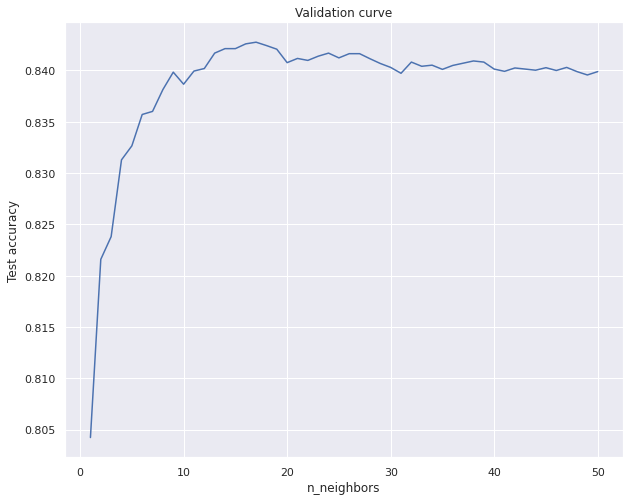

In [40]:
# Рисуем валидационную кривую
# По оси х --- значения гиперпараметров (param_n_neighbors)
# По оси y --- значения метрики (mean_test_score)

import matplotlib.pyplot as plt
results_df = pd.DataFrame(knn_grid.cv_results_)
plt.plot(results_df['param_n_neighbors'], results_df['mean_test_score'])

# Подписываем оси и график
plt.xlabel('n_neighbors')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

## 3 Выбор метрики в методе kNN

### 1. Переберите разные варианты значений параметра p по сетке от 1 до 10 с таким шагом, чтобы всего было протестировано 200 вариантов (удобно использовать функцию numpy.linspace ).
* Используйте KNeighborsClassifier или KNeighborsRegressor с оптимальным значением n_neighbors , найденным ранее. 
* Задайте опцию weights='distance' –– данный параметр добавляет в алгоритм веса, зависящие от расстояния до ближайших соседей. 
* В качестве метрики качества снова используйте accuracy . 
* Качество оценивайте с помощью кросс-валидации по 5 блокам.

In [41]:
%%time
kf = KFold(n_splits=5, shuffle=True, random_state=42) # n_splits играет роль K
knn = KNeighborsClassifier(n_neighbors=16, weights='distance')
scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [0.84481523 0.83867335 0.83794021 0.83701884 0.83609746]
Средняя метрика на кросс-валидации: 0.838909019480214
CPU times: user 33.1 s, sys: 94.1 ms, total: 33.2 s
Wall time: 33 s


**out:**
Массив значений метрики: [0.8449176  0.83846863 0.83773546 0.83742834 0.83660934]
Средняя метрика на кросс-валидации: 0.839031871698982
Wall time: 16 s

### 2. Определите, при каком p качество на кросс-валидации оказалось оптимальным.
Обратите внимание, что cross_val_score возвращает массив показателей качества по блокам;<br> необходимо максимизировать среднее этих показателей.

In [42]:
%%time
from sklearn.model_selection import GridSearchCV
knn_params={'p': np.linspace(1, 10, num=20)} # словарь параметров (ключ: набор возможных значений)

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy') # кросс-валидация по 5 блокам
knn_grid.fit(X_train, y_train)

CPU times: user 1h 5min 59s, sys: 4.46 s, total: 1h 6min 4s
Wall time: 1h 5min 47s


Wall time: 33min 45sGridSearchCV(cv=5,
             estimator=KNeighborsClassifier(n_neighbors=16, weights='distance'),
             param_grid={'p': array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])},
             scoring='accuracy')

Результат для 15ти соседей:
GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(n_neighbors=15, weights='distance'),
             param_grid={'p': array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])},
             scoring='accuracy')

In [43]:
# Смотрим лучшие значения параметров
print(knn_grid.best_params_)

# Лучшая модель
print(knn_grid.best_estimator_)

{'p': 1.4736842105263157}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16,
                     p=1.4736842105263157, weights='distance')


Для 16 соседей:
{'p': 1.4736842105263157}
KNeighborsClassifier(n_neighbors=16, p=1.4736842105263157, weights='distance')

{'p': 1.4736842105263157}
KNeighborsClassifier(n_neighbors=15, p=1.4736842105263157, weights='distance')

## 4 Другие метрические методы
Поэкспериментируйте с другими метрическими методами для задач регрессии и классификации, представленными в библиотеке Scikit-learn:

### RadiusNeighborsClassifier

In [44]:
from sklearn.neighbors import RadiusNeighborsClassifier
knn = RadiusNeighborsClassifier(radius=100.0)
knn.fit(X_train, y_train)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                          metric_params=None, n_jobs=None, outlier_label=None,
                          p=2, radius=100.0, weights='uniform')

In [46]:
%%time
y_pred = knn.predict(X_valid)
print(y_pred[:5])

[0 0 0 0 0]
CPU times: user 19.7 s, sys: 9min 21s, total: 9min 40s
Wall time: 9min 37s


In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid, y_pred))

0.7660306281221849


**out:**
0.7660306281221849

### NearestCentroid

In [48]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X_train, y_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [49]:
y_pred_1 = clf.predict(X_valid)
print(y_pred_1[:5])

[0 0 0 0 0]


In [50]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid, y_pred_1))

0.7685693227417902


**out:**
0.7685693227417902